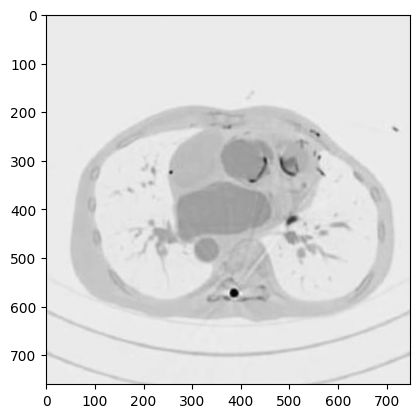

In [5]:
#biến đổi cường độ ảnh (từ sáng sang tối và ngược lại)

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('biendoicuongdo.png').convert('L')

im1=np.asarray(img)
im2 = 255-im1

new_img = Image.fromarray(im2)

img.show()

plt.imshow(new_img, cmap='gray')
plt.show()


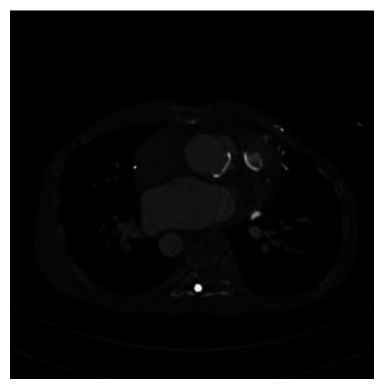

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('biendoicuongdo.png').convert('L')

# convert image to ndarray
im_1 = np.asarray(img)

# set gamma value
gamma = 3

# convert ndarray from int to float
b1 = im_1.astype(float)

# find maximum value in b1
b1_max = np.max(b1)

# normalize b1
b3 = b1 / b1_max

# apply gamma correction using log and exp
b3_log = np.log(b3 + 1e-8) * gamma  
c = np.exp(b3_log) * 255.0

# convert result to uint8
c1 = np.clip(c, 0, 255).astype(np.uint8)

# create image from array
d = Image.fromarray(c1)

# show images
img.show()
d.show()

# plot the image using matplotlib
plt.imshow(d, cmap='gray')
plt.axis('off')
plt.show()

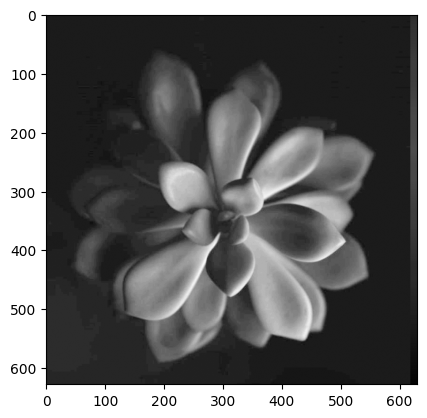

In [18]:
#thay doi cuong do diem anh

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('anhtoithui.png').convert('L')

im1=np.asarray(img)

b1 = im1.astype(float)
b2 = np.max(b1)
c = (128.0 * np.log(1+b1)/np.log(1+b2))
c1 = np.array(c, dtype=np.uint8)
d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap = 'gray')
plt.show()

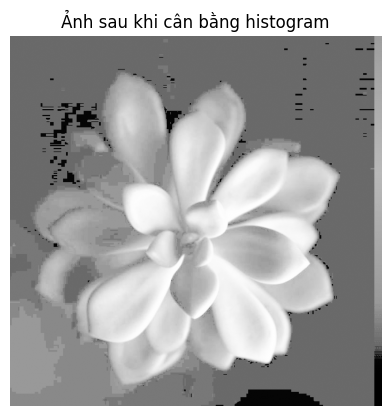

In [20]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# Mở ảnh và chuyển sang ảnh xám (grayscale)
img = Image.open('anhtoithui.png').convert('L')

# Chuyển ảnh sang mảng NumPy
im_array = np.asarray(img)

# Tính histogram (tần suất xuất hiện mỗi mức xám)
hist, bins = np.histogram(im_array.flatten(), bins=256, range=[0, 255])

# Tính hàm phân phối tích lũy (CDF)
cdf = hist.cumsum()

# Chuẩn hóa CDF bằng cách bỏ qua các giá trị 0
cdf_masked = np.ma.masked_equal(cdf, 0)

# Áp dụng công thức cân bằng histogram
cdf_min = cdf_masked.min()
cdf_max = cdf_masked.max()
cdf_normalized = (cdf_masked - cdf_min) * 255 / (cdf_max - cdf_min)

# Điền lại các giá trị bị mask (nếu có) và ép kiểu về uint8
cdf_final = np.ma.filled(cdf_normalized, 0).astype('uint8')

# Tra cứu giá trị pixel mới từ CDF đã cân bằng
equalized_array = cdf_final[im_array]

# Chuyển mảng ảnh đã xử lý thành ảnh PIL
equalized_img = Image.fromarray(equalized_array)

# Hiển thị ảnh gốc và ảnh sau khi cân bằng histogram
img.show(title="Ảnh gốc")
equalized_img.show(title="Ảnh đã cân bằng histogram")
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')
plt.title("Ảnh sau khi cân bằng histogram")
plt.show()


23 136


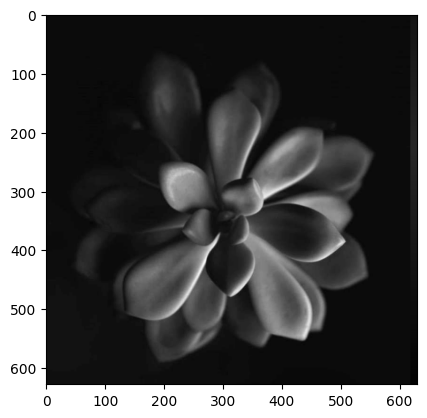

In [21]:
# như trên nhưng dùng pixel không dùng xác xuất

from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('anhtoithui.png').convert('L')

im1=np.asarray(img)

b = im1.max()
a = im1.min()
print(a,b)

c = im1.astype(float)
im2 = (255 * (c-a)/(b-a))
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

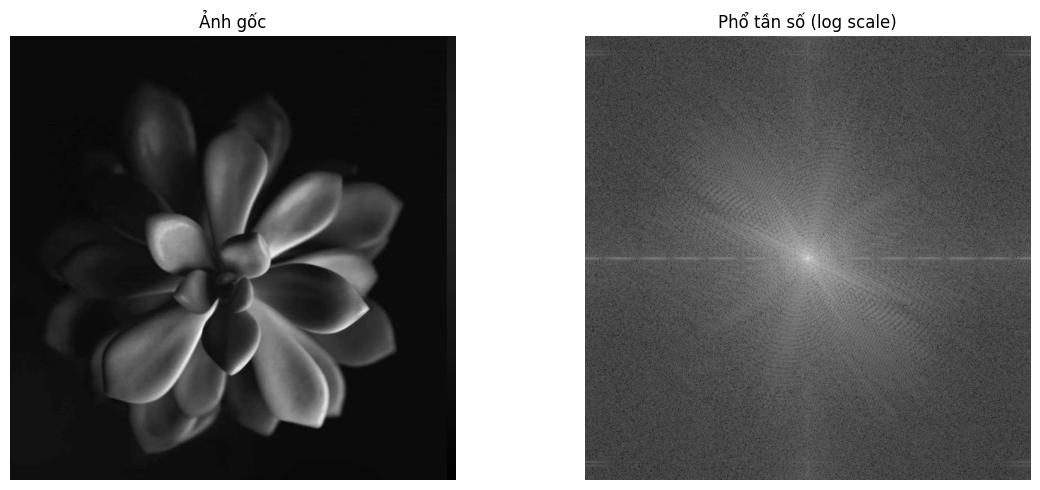

In [24]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from scipy.fftpack import fft2, fftshift

# 1. Mở ảnh grayscale
img = Image.open('anhtoithui.png').convert('L')

# 2. Chuyển ảnh thành mảng NumPy
im_array = np.asarray(img)

# 3. Thực hiện biến đổi Fourier 2D (FFT)
fft_result = fft2(im_array)

# 4. Lấy giá trị biên độ (magnitude spectrum)
magnitude = np.abs(fft_result)

# 5. Dịch tâm phổ tần số về giữa ảnh
magnitude_shifted = fftshift(magnitude)

# 6. Chuyển về kiểu float để hiển thị
magnitude_image = magnitude_shifted.astype(float)

# 7. Hiển thị kết quả
plt.figure(figsize=(12, 5))

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(im_array, cmap='gray')
plt.title("Ảnh gốc")
plt.axis('off')

# Hiển thị phổ Fourier
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + magnitude_image), cmap='gray')
plt.title("Phổ tần số (log scale)")
plt.axis('off')

plt.tight_layout()
plt.show()


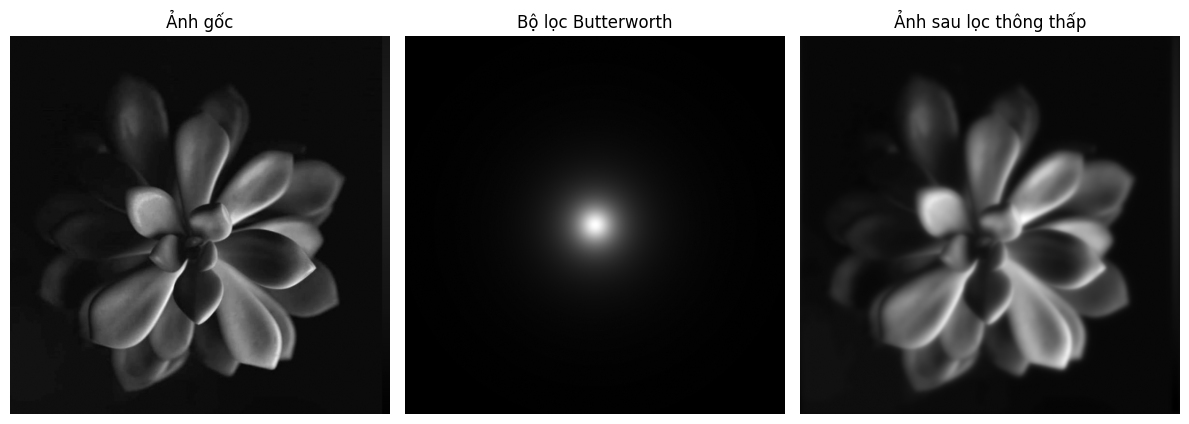

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.fftpack import fft2, fftshift, ifft2

# 1. Mở ảnh grayscale
img = Image.open('anhtoithui.png').convert('L')

# 2. Chuyển ảnh thành mảng NumPy
img_array = np.asarray(img)

# 3. Biến đổi Fourier 2D và dịch tâm
fft_image = fft2(img_array)
fft_shifted = fftshift(fft_image)

# 4. Tạo bộ lọc Butterworth thông thấp
M, N = img_array.shape
H = np.ones((M, N))

# Thông số bộ lọc
d0 = 30.0  # Cut-off radius
n = 1      # Bậc của Butterworth

# Tính khoảng cách Euclidean từ tâm
center_M, center_N = M / 2, N / 2
for u in range(M):
    for v in range(N):
        D = math.sqrt((u - center_M) ** 2 + (v - center_N) ** 2)
        H[u, v] = 1 / (1 + (D / d0) ** (2 * n))

# 5. Nhân ảnh Fourier đã dịch với bộ lọc
filtered_fft = fft_shifted * H

# 6. Biến đổi Fourier ngược để thu ảnh đã lọc
filtered_image = np.abs(ifft2(filtered_fft))

# 7. Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.title('Bộ lọc Butterworth')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Ảnh sau lọc thông thấp')
plt.axis('off')

plt.tight_layout()
plt.show()


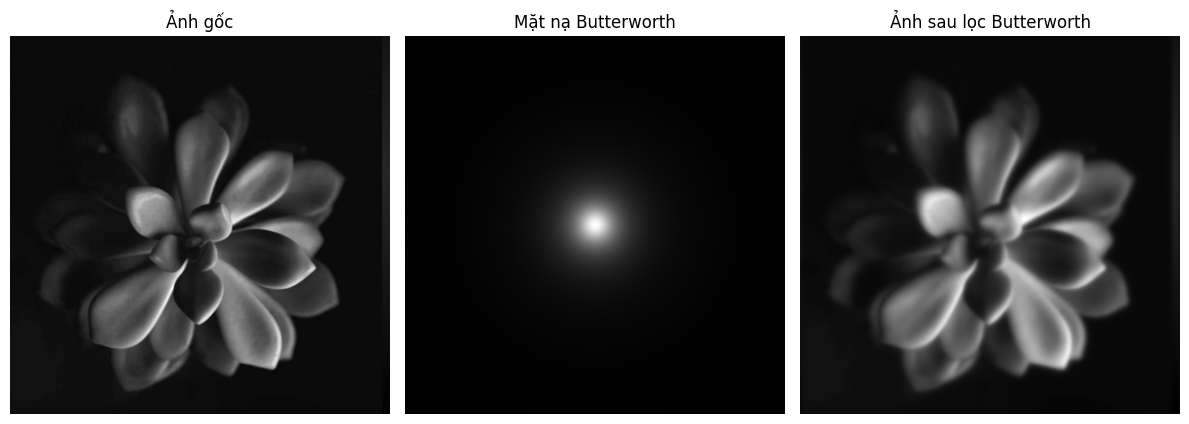

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.fftpack import fft2, fftshift, ifft2

# 1. Đọc ảnh và chuyển sang ảnh xám
img = Image.open('anhtoithui.png').convert('L')
img_array = np.asarray(img)

# 2. Biến đổi Fourier và dịch tâm
fft_img = fft2(img_array)
fft_shifted = fftshift(fft_img)
fft_magnitude = np.abs(fft_shifted)

# 3. Khởi tạo tham số cho Butterworth Lowpass Filter
M, N = img_array.shape
H = np.ones((M, N))

D0 = 30.0  # Cut-off frequency
n = 1      # Order of the filter
center_M, center_N = M / 2, N / 2

# 4. Tính mặt nạ bộ lọc Butterworth
for u in range(M):
    for v in range(N):
        D = math.sqrt((u - center_M) ** 2 + (v - center_N) ** 2)
        if D > 0:
            H[u, v] = 1 / (1 + (D / D0) ** (2 * n))

# 5. Áp dụng bộ lọc trong miền tần số
filtered_fft = fft_shifted * H

# 6. Biến đổi Fourier ngược và lấy biên độ ảnh
img_filtered = np.abs(ifft2(filtered_fft))

# 7. Hiển thị kết quả
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img_array, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(H, cmap='gray')
plt.title('Mặt nạ Butterworth')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_filtered, cmap='gray')
plt.title('Ảnh sau lọc Butterworth')
plt.axis('off')

plt.tight_layout()
plt.show()
